# Clasificación con una ANN y visualización de la frontera de decisión

En este notebook:

1. **Generamos** un dataset bidimensional con `make_moons`.  
2. **Mostramos** los datos originales.  
3. **Definimos** una ANN usando Keras.  
4. **Entrenamos** la red registrando la evolución de la pérdida y la precisión.  
5. **Visualizamos** la frontera de decisión aprendida.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History

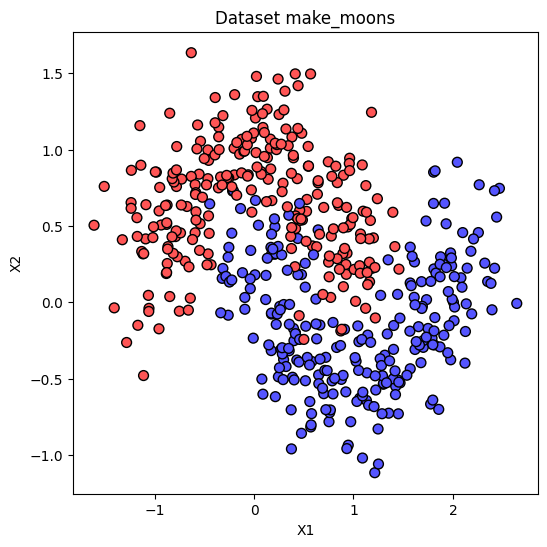

In [2]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['#FF5555','#5555FF']), edgecolor='k', s=50)
plt.title("Dataset make_moons")
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

In [3]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/home/fablabs/jupyterhub/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

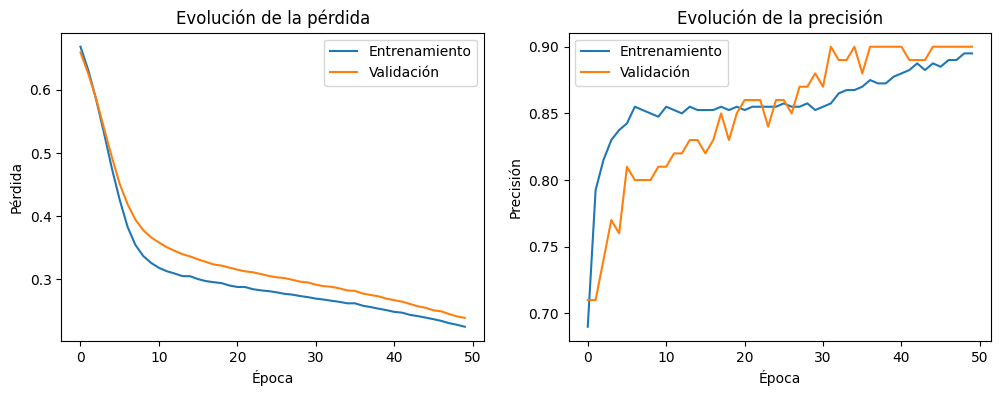

In [4]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, verbose=0)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Evolución de la pérdida")
plt.xlabel("Época"); plt.ylabel("Pérdida")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Evolución de la precisión")
plt.xlabel("Época"); plt.ylabel("Precisión")
plt.legend()

plt.show()

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 21s 655us/step


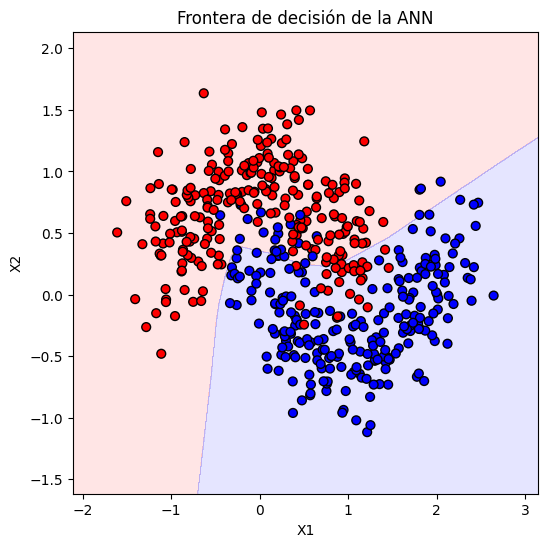

In [5]:
def plot_decision_boundary(model, X, y, steps=1000, cmap='Paired'):
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                         np.linspace(y_min, y_max, steps))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAAAFF']))
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000','#0000FF']), s=40)
    plt.title("Frontera de decisión de la ANN")
    plt.xlabel("X1"); plt.ylabel("X2")
    plt.show()

plot_decision_boundary(model, X, y)